In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv' , delimiter=';' , encoding = 'latin1')

In [9]:
print(data.columns)

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [10]:
data = data[['Age', 'PTS']].dropna()
data.rename(columns={'PTS': 'PPG'}, inplace=True)

In [11]:
print(data.columns)

Index(['Age', 'PPG'], dtype='object')


In [12]:
X = data[['Age']]
Y = data[['PPG']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 42.55457007079184
R^2 Score: 0.007837819979434113


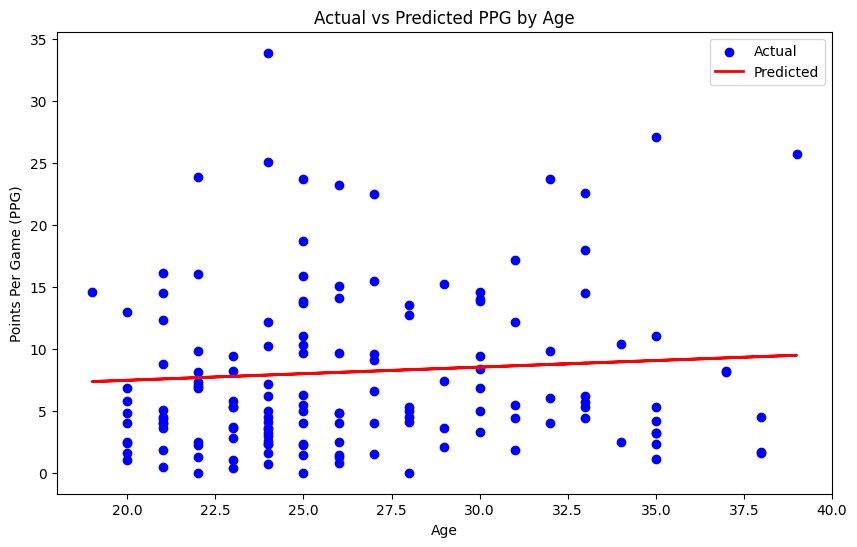

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted PPG by Age')
plt.xlabel('Age')
plt.ylabel('Points Per Game (PPG)')
plt.legend()
plt.show()